In [3]:
import pandas as pd
import numpy as np

In [146]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [78]:
from fbprophet.plot import add_changepoints_to_plot

In [1]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline

In [60]:
hour = pd.read_csv('data/hour.csv')
# hour['dteday'] = pd.to_datetime(hour['dteday'])
hour['date'] = pd.to_datetime(hour.dteday.astype(str) +' '+ hour.hr.apply(lambda hour: str(hour) + ':00:00' if hour > 9 else '0' + str(hour) + ':00:00') )
hour.set_index('date', inplace=True)
hour.head()

instant      dteday  season  yr  mnth  hr  holiday  \
date                                                                      
2011-01-01 00:00:00        1  2011-01-01       1   0     1   0        0   
2011-01-01 01:00:00        2  2011-01-01       1   0     1   1        0   
2011-01-01 02:00:00        3  2011-01-01       1   0     1   2        0   
2011-01-01 03:00:00        4  2011-01-01       1   0     1   3        0   
2011-01-01 04:00:00        5  2011-01-01       1   0     1   4        0   

                     weekday  workingday  weathersit  temp   atemp   hum  \
date                                                                       
2011-01-01 00:00:00        6           0           1  0.24  0.2879  0.81   
2011-01-01 01:00:00        6           0           1  0.22  0.2727  0.80   
2011-01-01 02:00:00        6           0           1  0.22  0.2727  0.80   
2011-01-01 03:00:00        6           0           1  0.24  0.2879  0.75   
2011-01-01 04:00:00        6           0           1  0.24  0.2879  0.75   

                     windspeed  casual  registered  cnt  
date                                                     
2011-01-01 00:00:00        0.0       3          13   16  
2011-01-01 01:00:00        0.0       8          32   40  
2011-01-01 02:00:00        0.0       5          27   32  
2011-01-01 03:00:00        0.0       3          10   13  
2011-01-01 04:00:00        0.0       0           1    1

### Split dataset into test and train taking split_date as 2012-06-30

In [63]:
split_date = '2012-06-30'
train = hour.loc[hour.index <= split_date].copy()
test = hour.loc[hour.index > split_date].copy()

In [123]:
test.index.min()

Timestamp('2012-06-30 01:00:00')

In [66]:
# test_dataset= pd.DataFrame()
# test_dataset['ds'] = X_test
# test_dataset['y']= t_test
# test_dataset.head(2)

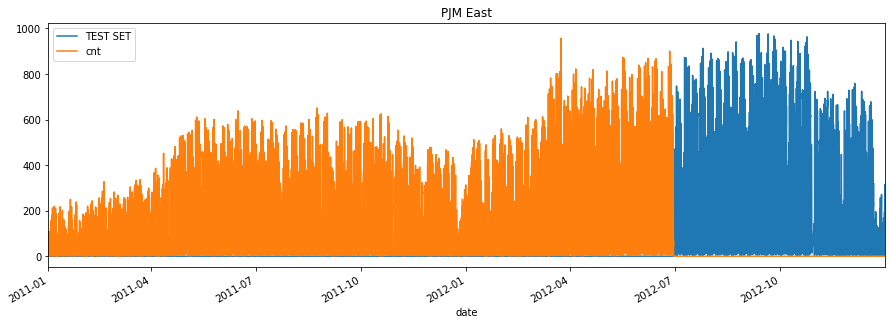

In [70]:
test[['cnt']] \
    .rename(columns={'cnt': 'TEST SET'}) \
    .join(train[['cnt']].rename(columns={'y': 'TRAINING SET'}), how='outer') \
    .fillna(0)\
    .plot(figsize=(15,5), title='PJM East')
plt.show()

In [74]:
train_df = train[['cnt']].reset_index()
train_df.rename(columns={'date': 'ds', 'cnt': 'y'}, inplace=True)
train_df.head(2)

ds   y
0 2011-01-01 00:00:00  16
1 2011-01-01 01:00:00  40

### Prophet model with:
* holidays

In [82]:
m = Prophet()
m.add_country_holidays(country_name='US')
m.fit(train_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [85]:
future= m.make_future_dataframe(periods=300,freq='H')
future.tail(2)

ds
13278 2012-07-12 11:00:00
13279 2012-07-12 12:00:00

In [86]:
forecast=m.predict(future)

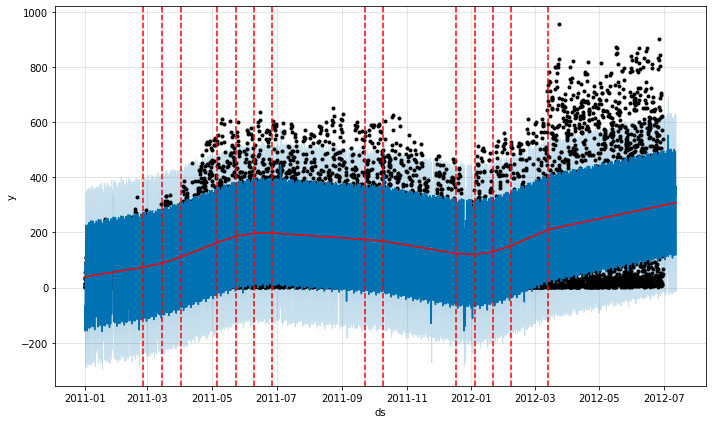

In [87]:
fig =m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

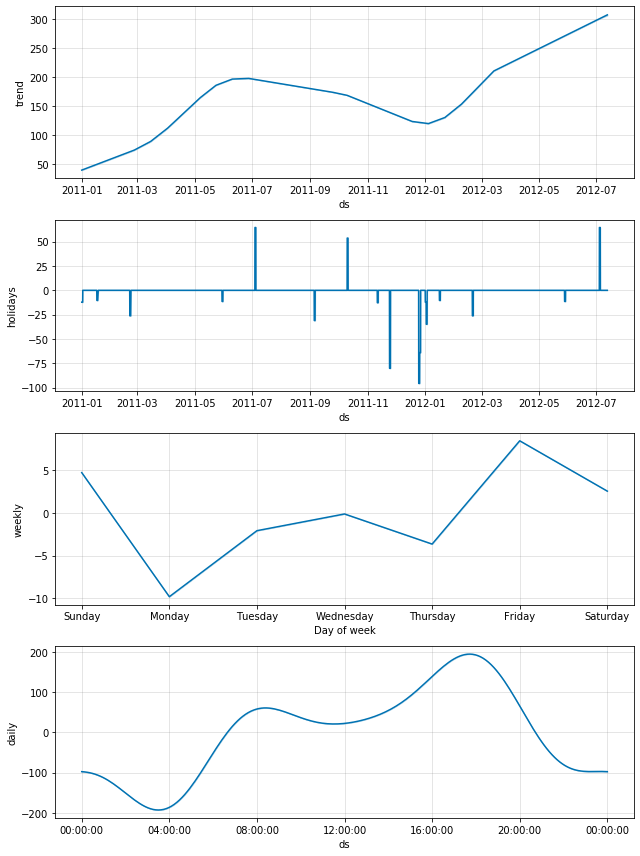

In [88]:
fig1 = m.plot_components(forecast)

In [89]:
test_df = test[['cnt']].reset_index()
test_df.rename(columns={'date': 'ds', 'cnt': 'y'}, inplace=True)
test_df.head(2)

ds   y
0 2012-06-30 01:00:00  58
1 2012-06-30 02:00:00  61

### Predict on test dataset

In [100]:
test_fcst = m.predict(test_df)
test_fcst.head()

ds       trend  yhat_lower  yhat_upper  trend_lower  \
0 2012-06-30 01:00:00  297.915376   54.738841  313.484706   297.915376   
1 2012-06-30 02:00:00  297.948906   27.638374  280.576114   297.948906   
2 2012-06-30 03:00:00  297.982435   -6.665842  242.023816   297.982435   
3 2012-06-30 04:00:00  298.015964  -18.744931  247.778183   298.015964   
4 2012-06-30 05:00:00  298.049493   23.925855  305.748402   298.049493   

   trend_upper  Christmas Day  Christmas Day_lower  Christmas Day_upper  \
0   297.915376            0.0                  0.0                  0.0   
1   297.948906            0.0                  0.0                  0.0   
2   297.982435            0.0                  0.0                  0.0   
3   298.015964            0.0                  0.0                  0.0   
4   298.049493            0.0                  0.0                  0.0   

   Christmas Day (Observed)  ...  holidays  holidays_lower  holidays_upper  \
0                       0.0  ...       0.0             0.0             0.0   
1                       0.0  ...       0.0             0.0             0.0   
2                       0.0  ...       0.0             0.0             0.0   
3                       0.0  ...       0.0             0.0             0.0   
4                       0.0  ...       0.0             0.0             0.0   

     weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0  2.508843      2.508843      2.508843                   0.0   
1  2.515770      2.515770      2.515770                   0.0   
2  2.559406      2.559406      2.559406                   0.0   
3  2.637662      2.637662      2.637662                   0.0   
4  2.747836      2.747836      2.747836                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper        yhat  
0                         0.0                         0.0  187.505492  
1                         0.0                         0.0  149.711151  
2                         0.0                         0.0  113.620017  
3                         0.0                         0.0  114.441054  
4                         0.0                         0.0  166.519849  

[5 rows x 61 columns]

### Plot predictions with confidence intervals 

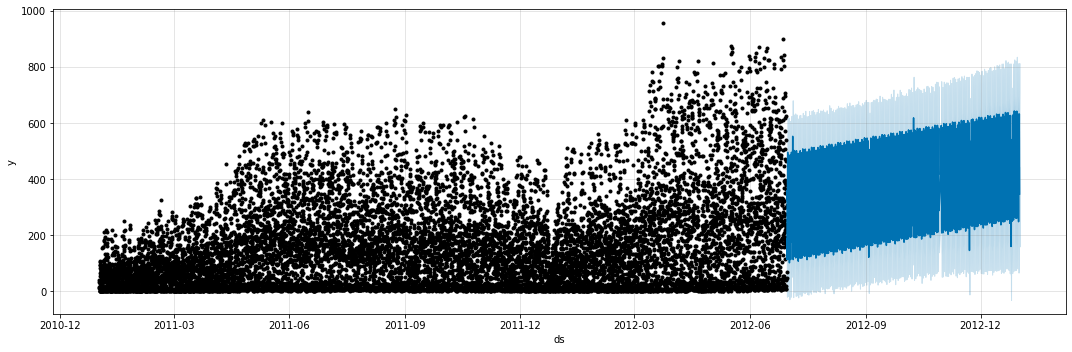

In [102]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = m.plot(test_fcst,
                 ax=ax)
plt.show()

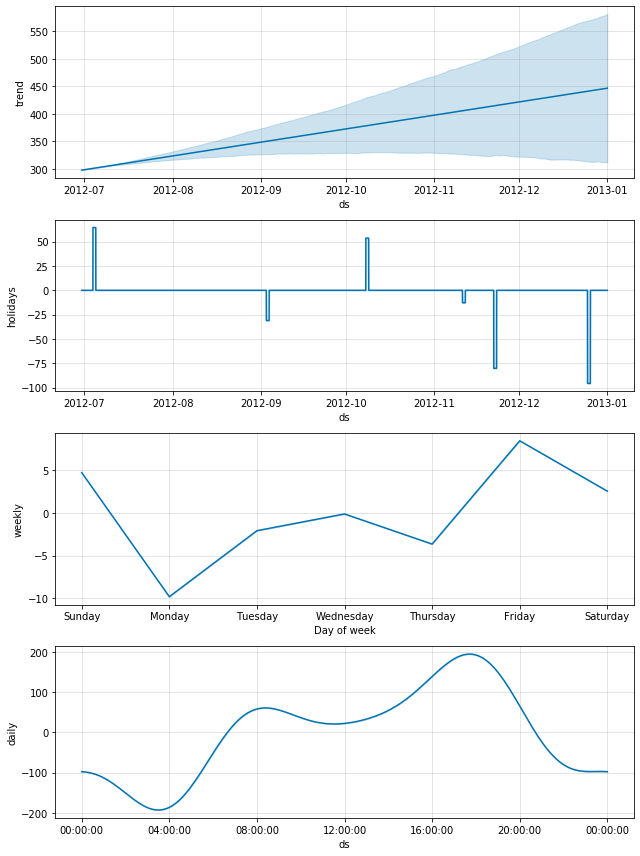

In [104]:
fig = m.plot_components(test_fcst)

### compare actual vs predicted

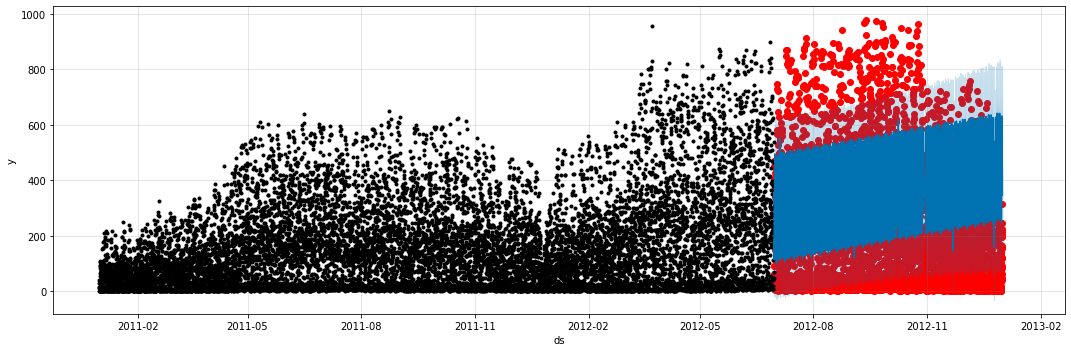

In [109]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(test_df.ds, test_df['y'], color='r')
fig = m.plot(test_fcst, ax=ax)

In [126]:
test_df.ds

0      2012-06-30 01:00:00
1      2012-06-30 02:00:00
2      2012-06-30 03:00:00
3      2012-06-30 04:00:00
4      2012-06-30 05:00:00
               ...        
4394   2012-12-31 19:00:00
4395   2012-12-31 20:00:00
4396   2012-12-31 21:00:00
4397   2012-12-31 22:00:00
4398   2012-12-31 23:00:00
Name: ds, Length: 4399, dtype: datetime64[ns]

In [132]:
import datetime

### compare for the first month of predictions

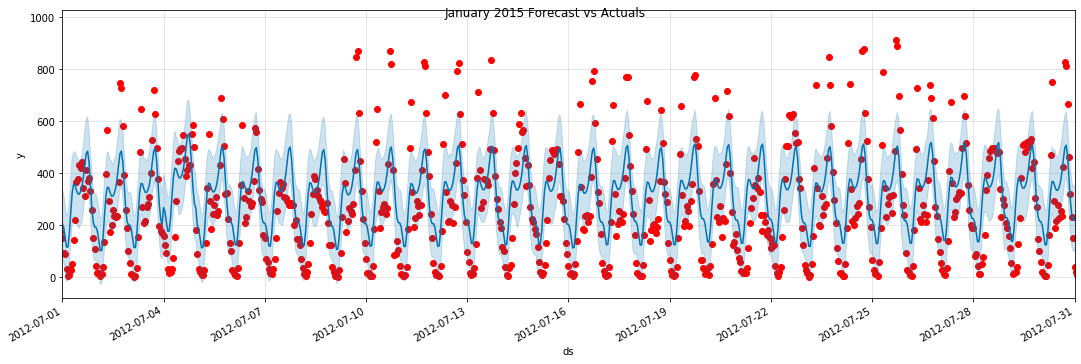

In [144]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(test_df.ds, test_df['y'], color='r')
f.autofmt_xdate()

fig = m.plot(test_fcst, ax=ax)
ax.set_xlim([datetime.date(2012, 7, 1), datetime.date(2012, 7, 31)])

plot = plt.suptitle('January 2015 Forecast vs Actuals')

### compare for the first week of predictions

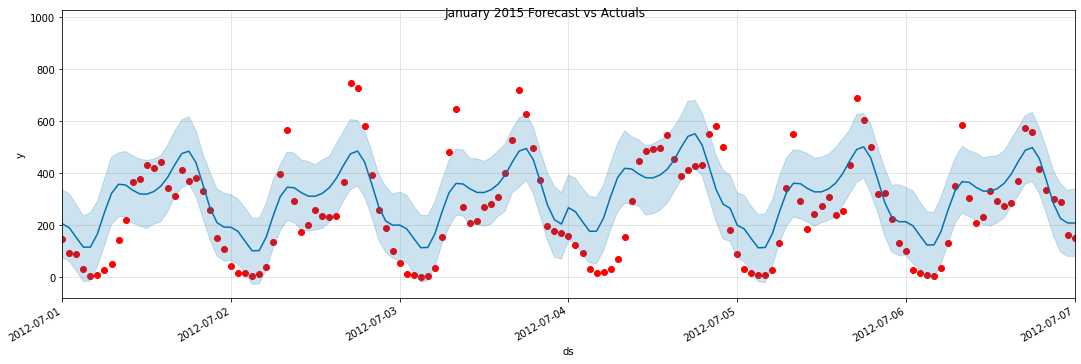

In [145]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(test_df.ds, test_df['y'], color='r')
f.autofmt_xdate()

fig = m.plot(test_fcst, ax=ax)
ax.set_xlim([datetime.date(2012, 7, 1), datetime.date(2012, 7, 7)])

plot = plt.suptitle('January 2015 Forecast vs Actuals')

### Errors

In [147]:
mean_squared_error(y_true=test_df['y'],
                   y_pred=test_fcst['yhat'])

42910.98633961491

In [148]:
mean_absolute_error(y_true=test_df['y'],
                   y_pred=test_fcst['yhat'])

178.2860223920801

In [149]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_true=test_df['y'],
                   y_pred=test_fcst['yhat'])

608.6318828689001